# Details of Logistic Regression and Feature Exploration 

> # Examining the Relationships between Features and the Response

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
df = pd.read_csv("Chapter_1_cleaned_data.csv")

In [2]:
# Getting a list of all the columns headers and putting them into a list

features_response = df.columns.tolist()

In [3]:
features_response[:5] # first five

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [4]:
features_response[-5:] # last five

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [5]:
items_to_remove = ["ID","SEX","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","EDUCATION_CAT","graduate school","high school","none","others","university"]


In [6]:
features_response = [item for item in features_response if item not in items_to_remove]
print(features_response)

['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


# Pearson Correlation

In [7]:
corr = df[features_response].corr() 
corr.iloc[0:5,0:5] # first five rows and columns of the correlation matrix

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


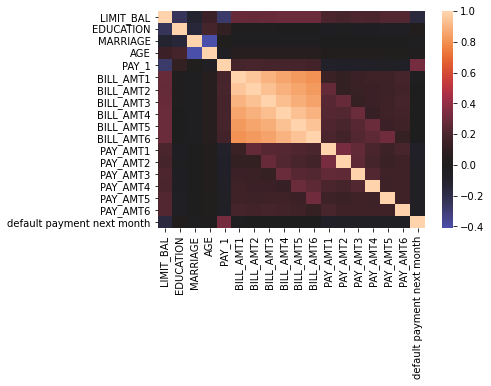

In [8]:
# Using seaborn to plot the correlations between variables
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,center=0)

In [9]:
# It appears from the plot that the only 2 corrlerated features are PAY_1 positive and LIMIT_BAL negative

### Note that Pearson correlation is theoretically only valid for continuous response variables it can still be used
### to glean some info about the relationships between reponse and feature variables. 

# F-test

In [10]:
# One test we can run to see whether features are associated with a categorical response is the ANOVA F-test available in 
# scikit-learn as f_classif

# F-test and Univariate Feature Selection 

In [11]:
# First step in doing the ANOVA F-test is to separate out the features and response as Numpy arrays using the list of cols.
# created earlier as well as using integer indexing in pandas.

X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values

print(X.shape,y.shape)

(26664, 17) (26664,)


In [12]:
from sklearn.feature_selection import f_classif

In [13]:
[f_stat, f_p_value] = f_classif(X,y)

In [14]:
# Creating a new dataframe containing the features names and these outputs, to faciliate our inspection. One way to specify a new 
# dataframe is by using a dictionary with key:value pairs of colimn names and the data to be contained in each column. 
# the dataframe will be sorted by p-value in ascending order.

f_test_df = pd.DataFrame({"Feature":features_response[:-1],"F statistic":f_stat, "p value":f_p_value})
f_test_df.sort_values("p value")

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [15]:
# Selecting the top 20% of features according to the F-test first import SelectPercentile class
from sklearn.feature_selection import SelectPercentile

In [16]:
# Instantiate an object of this class, indicating we'd like to use the same feature selection criteria, ANOVA F-test
# and the top 20% oof features

selector = SelectPercentile(f_classif,percentile=20)

In [17]:
# Use the fit method to fit the object on our features and response data 
selector.fit(X,y)

SelectPercentile(percentile=20)

In [18]:
# Capture the indices of the selected features in an array named best_feature_ix

best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [19]:
# Selecting which features to use based on the boolean array

features = features_response[:-1]
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]

In [20]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

# Visualizing the Relationship between Feature and Response

In [21]:
# Calculate a baseline for the response variable of the default rate across the whole dataset using pandas

overall_default_rate = df["default payment next month"].mean()
overall_default_rate

0.2217971797179718

In [22]:
# Using groupby/mean to get a visual of the default rates for different values of the PAY_1 feature

group_by_pay_mean_y = df.groupby("PAY_1").agg({"default payment next month":np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


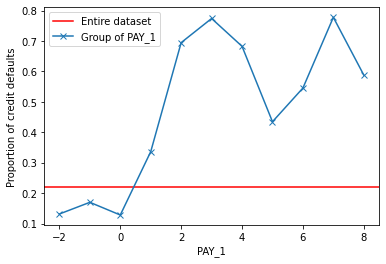

In [23]:
# Plotting PAY_1 and default payment next month

# Creating a axes object

axes = plt.axes()

# Plotting the overall default rate as a red horizontal line using the axhline
axes.axhline(overall_default_rate,color="red")

# Now over this line we will plot the default rate within each group of PAY_1 values

group_by_pay_mean_y.plot(marker = "x",legend = False,ax=axes)


#Setting the y-axis label and create a legend instance 

axes.set_ylabel("Proportion of credit defaults")
axes.legend(["Entire dataset","Group of PAY_1"])

In [24]:
# Our visualization of payment statuses has revealed a clear story. Those who defaulted before are in fact more likely to default
# again.

In [25]:
# Now we focus attention to the feature ranked as having the second strongest LIMIT_BAL

# This feature is numerical with many unique values. A good way to visualize features such as this for a classification problem
# is to plot multiple histograms on the same axis, with different colors for the different classes. A way to separate the classes
# we can index them from the Dataframe using logical arrays.

In [26]:
# Creating the code to create the logical masks for pos and neg samples

pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

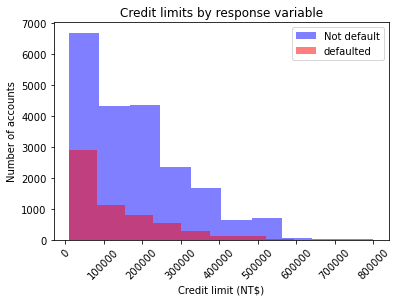

In [27]:
# Creating the histogram plot

axes = plt.axes()
axes.hist(df.loc[neg_mask,"LIMIT_BAL"],alpha=0.5,color="blue")
axes.hist(df.loc[pos_mask,"LIMIT_BAL"],alpha=0.5,color="red")
axes.tick_params(axis="x",labelrotation=45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Number of accounts")
axes.legend(["Not default","defaulted"])
axes.set_title("Credit limits by response variable")

In [28]:
# While the above plot shows everything we wished to present it's not quite as interpretable as it could be. It would be more
# informative to show something about how the shapes of these histograms are different. We can make the total plotted area of 
# the two histograms the same y normalizing them. Matplotlib provides a keyword argument that makes this easy creating what might
# be considered an empirical version of a probability mass function. 

In [29]:
# Creating the histogram bin edges 

bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

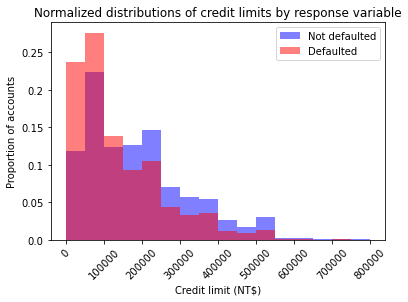

In [30]:
# Creating the normalized histograms we multiply the y-axis tick labels by the bin width of NT$50000 for the bin heights to 
# represent the proportion of the total number of samples in each bin.

axes = plt.axes()
axes.hist(df.loc[neg_mask,"LIMIT_BAL"],bins=bin_edges,alpha=0.5,density=True,color="blue")
axes.hist(df.loc[pos_mask,"LIMIT_BAL"],bins=bin_edges,alpha=0.5,density=True,color="red")
axes.tick_params(axis='x',labelrotation=45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Proportion of accounts")
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(["Not defaulted","Defaulted"])
axes.set_title("Normalized distributions of credit limits by response variable")

In [31]:
# From The plot above it looks like accounts with tha default tend to have a higher proportion of lower credit limits.

# Examining the Appropriateness of Features for Logistic Regression

In [32]:
# Evalutating the appropriateness of the feature PAY_1 for logistic Regression by examining the log odds of default within 
# these groups to see whether the response variable is linear in the log odds as logistic regression formally assumes.

# Checking to see if the dataframe of the average value of response variable for different values of PAY_1

group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [33]:
# Extracting the mean values of the response variable from these groups and putting them in a variable p 

p = group_by_pay_mean_y["default payment next month"].values

In [34]:
# Creating a probability q of not defaulting. 
q = 1 - p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [35]:
# Calculate the odds ratio from p and q as well as the log odds, using the natural logarithm function from Numpy

odds_ratio = p/q
log_odds = np.log(odds_ratio)
print(log_odds)

[-1.88632574 -1.58561322 -1.91611649 -0.67937918  0.82219194  1.23088026
  0.76546784 -0.26236426  0.18232156  1.25276297  0.35667494]


Text(0.5, 0, 'Values of PAY_1')

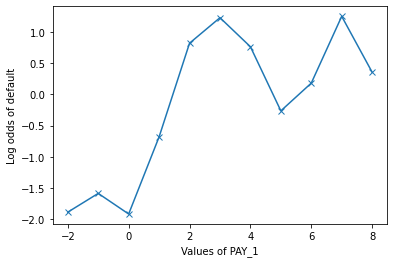

In [36]:
# To plot the log odds against the values of the feature we can get the feature values from the index of the dataframe 
# containing the groupby/mean. 

plt.plot(group_by_pay_mean_y.index,log_odds,"-x")
plt.ylabel("Log odds of default")
plt.xlabel("Values of PAY_1")

# Linear Decision Boundary of Logistic Regression

In [37]:
# To illustrate the concept of a decision boundary for a binary classification problem. We use synthetic data to create a clear
# example of how the decision boundary of logistic regression looks in comparison to the training samples

# Generate the feautures using the following code:

np.random.seed(seed=6)

X_1_pos = np.random.uniform(low=1,high=7,size=(20,1))
print(X_1_pos[:3])

X_1_neg = np.random.uniform(low=3,high=10,size=(20,1))
print(X_1_neg[:3])

X_2_pos = np.random.uniform(low=1,high=7,size=(20,1))
print(X_2_pos[:3])

X_2_neg = np.random.uniform(low=3,high=10,size=(20,1))
print(X_1_neg[:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[5.4790643 ]
 [5.3444234 ]
 [3.43664678]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


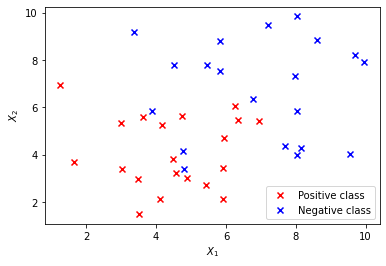

In [38]:
# Plotting the synthetic data 

plt.scatter(X_1_pos,X_2_pos,color="red",marker="x")
plt.scatter(X_1_neg,X_2_neg,color="blue",marker="x")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(["Positive class","Negative class"])

In [39]:
# In order to use our synthetic features with scikit-learn we need to assemble them into a matrix. We use Numpy's block function
# for this to create a 40 by 2 matrix

X = np.block([[X_1_pos,X_2_pos],[X_1_neg,X_2_neg]])
print(X.shape)
print(X[:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [41]:
# Now we need to create the response variable to go with these features. We need an array of y values to let scikit-learn know
# Create a vertical stack (vstack) of 20 1s and then 20 0s to match our arrangement of the features and reshape to the way that
# scikit-learn expects

y = np.vstack((np.ones((20,1)),np.zeros((20,1)))).reshape(40,)
print(y[:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [42]:
# First import the model class 
from sklearn.linear_model import LogisticRegression

In [43]:
# Now instantiate, indicating the liblinear solver 

example_lr = LogisticRegression(solver="liblinear")
example_lr

LogisticRegression(solver='liblinear')

In [44]:
# Now train the model on the synthetic data

example_lr.fit(X,y)

LogisticRegression(solver='liblinear')

In [46]:
# Code to get the predictions and separate them into indices of postive and negative class predictions

y_pred = example_lr.predict(X)

positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]

#checking the results of the positive array

positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

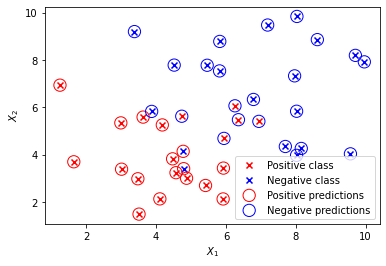

In [49]:
# From the indices of positive predictions, we can already tell that not every sample in the training data was classified 
# correctly the positive samples were the first 20, but there are indices outside of that range. 

# Now plotting the predictions 

plt.scatter(X_1_pos,X_2_pos,color="red",marker="x")
plt.scatter(X_1_neg,X_2_neg,color="blue",marker="x")
plt.scatter(X[positive_indices,0],X[positive_indices,1],s=150,marker="o",edgecolor="red",facecolors="none")
plt.scatter(X[negative_indices,0],X[negative_indices,1],s=150,marker="o",edgecolor="blue",facecolors="none")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(["Positive class","Negative class","Positive predictions","Negative predictions"])

In [50]:
# From the plot it's apparent that the classifier struggles with data points that are close to where you may imagine the linear
# decision boundary to be.

# to Obtain the decision boundary of a logistic regression boundary in a 2d feature space. using the inequality 
# X2 >= -(θ1/ θ2)X1 - ( θ0/ θ2)

#Obtaining the coefficients from the fitted model and printing them

theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1,theta_2)

-0.20245058016285844 -0.25336423626773213


In [51]:
# Getting the intercept
theta_0 = example_lr.intercept_

# Now use the coefficients and intercepts to define the linear decision boundary. This captures the divinding line of the 
# inequality, X2 >= -(θ1/ θ2)X1 - ( θ0/ θ2)
X_1_decision_boundary = np.array([0,10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary-(theta_0/theta_2)

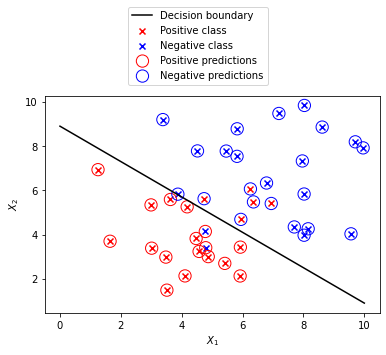

In [52]:
# Plotting the decision boundary

pos_true = plt.scatter(X_1_pos,X_2_pos,color="red",marker="x",label="Positive class")
neg_true =  plt.scatter(X_1_neg,X_2_neg,color="blue",marker="x",label="Negative class")
pos_pred = plt.scatter(X[positive_indices,0],X[positive_indices,1],s=150,marker="o",edgecolor="red",facecolors="none",label="Positive predictions")
neg_pred = plt.scatter(X[negative_indices,0],X[negative_indices,1],s=150,marker="o",edgecolor="blue",facecolors="none",label = "Negative predictions")
dec = plt.plot(X_1_decision_boundary,X_2_decision_boundary,"k-",label="Decision boundary")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(loc=[0.25,1.05])
